In [1]:
%matplotlib widget
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

/home/lacosta-gamboa/miniconda3/envs/plantcv/lib/python3.9/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.


In [8]:
# Set debug to the global parameter 
pcv.params.debug = args.debug
# Change display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20

In [73]:
# Input/output options
args = WorkflowInputs(
    images=["/shares/mgehan_share/lacosta-gamboa/Jupyter/thermal/pennycress_titration/2021-07-ABA_pennycress_drench_spray_titration/after_application/thermal/FLIR0077.csv"],
    names="image1",
    result="",
    outdir=".",
    writeimg=True,
    debug="plot"
    )

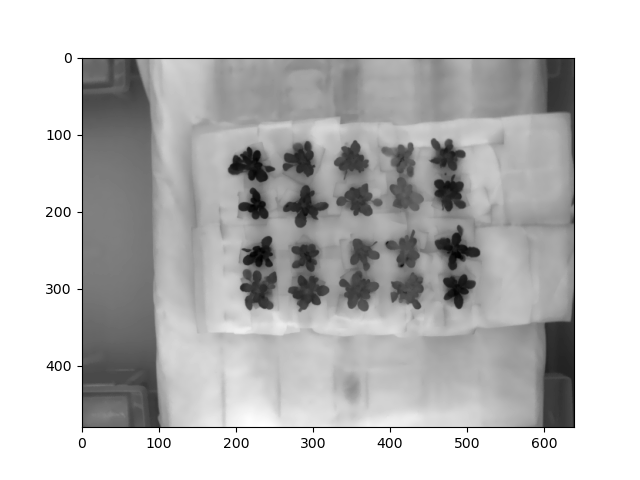

In [74]:
# Read image

# Inputs:
#   filename - Image file to be read in 
#   mode - How to read in the image; either 'native' (default), 'rgb', 'gray', or 'csv'
thermal_data, path, filename = pcv.readimage(filename=args.image1, mode='csv')

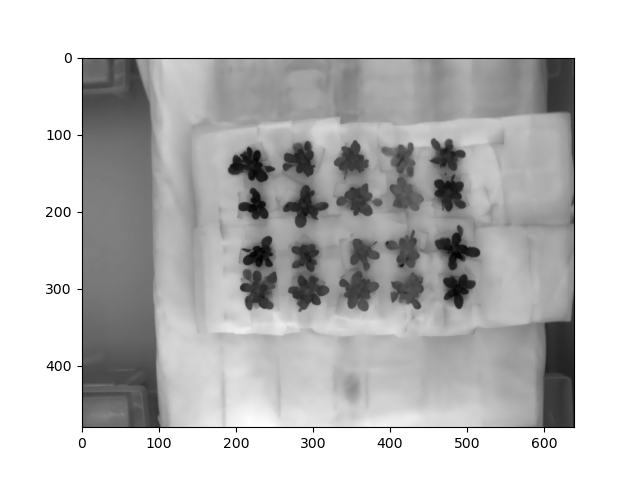

In [75]:
# Rescale the thermal data to a colorspace with range 0-255 rather than raw data 
    
# Inputs:
#   gray_img - Grayscale image data 
#   min_value - New minimum value for range of interest. default = 0
#   max_value - New maximum value for range of interest. default = 255
scaled_thermal_img = pcv.transform.rescale(gray_img=thermal_data)

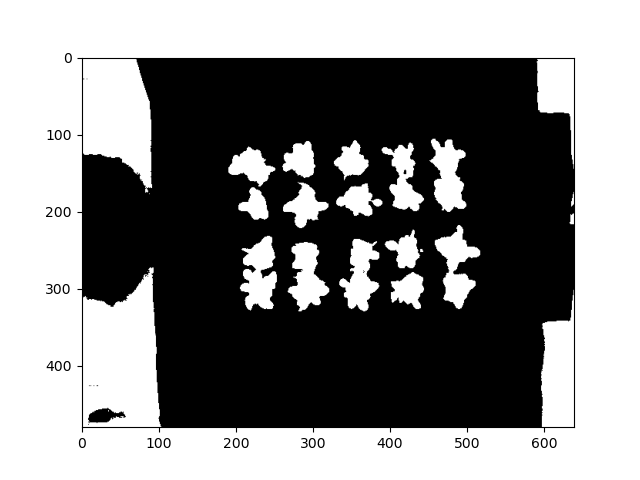

In [76]:
# Threshold the thermal data to make a binary mask
    
# Inputs:
#   gray_img - Grayscale image data 
#   threshold- Threshold value (between 0-255)
#   max_value - Value to apply above threshold (255 = white) 
#   object_type - 'light' (default) or 'dark'. If the object is lighter than the background then standard 
#                 threshold is done. If the object is darker than the background then inverse thresholding is done. 
bin_mask = pcv.threshold.binary(gray_img=scaled_thermal_img, threshold=115, max_value=255, object_type='dark')

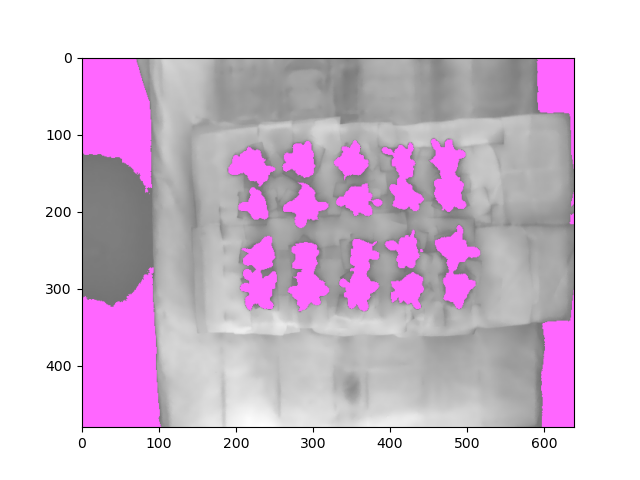

In [77]:
# Identify objects
    
# Inputs: 
#   img - RGB or grayscale image data for plotting 
#   mask - Binary mask used for detecting contours 
id_objects, obj_hierarchy = pcv.find_objects(img=scaled_thermal_img, mask=bin_mask)

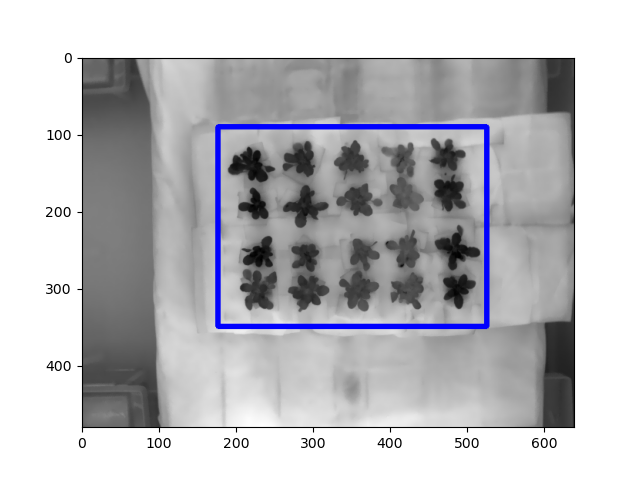

In [78]:
# Define the region of interest (ROI) 

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 
roi, roi_hierarchy= pcv.roi.rectangle(img=scaled_thermal_img, x=176, y=90, h=260, w=350)

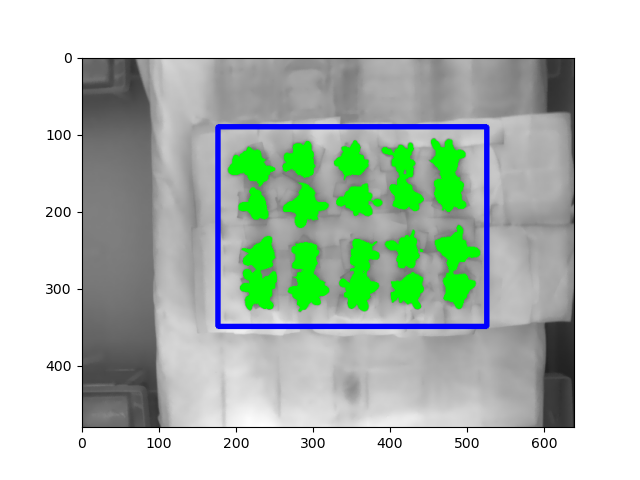

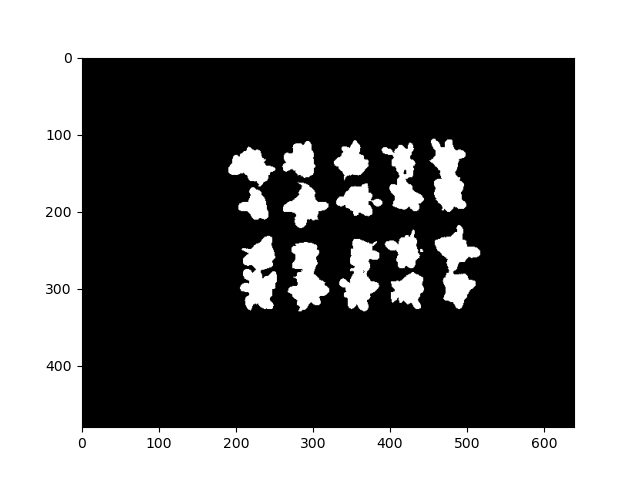

In [79]:
# Decide which objects to keep

# Inputs:
#    img            = img to display kept objects
#    roi_contour    = contour of roi, output from any ROI function
#    roi_hierarchy  = contour of roi, output from any ROI function
#    object_contour = contours of objects, output from pcv.find_objects function
#    obj_hierarchy  = hierarchy of objects, output from pcv.find_objects function
#    roi_type       = 'partial' (default, for partially inside the ROI), 'cutto', or 
#                     'largest' (keep only largest contour)
roi_objects, hierarchy, kept_mask, obj_area = pcv.roi_objects(img=scaled_thermal_img,roi_contour=roi,
                                                              roi_hierarchy=roi_hierarchy,
                                                              object_contour=id_objects,
                                                              obj_hierarchy=obj_hierarchy, 
                                                              roi_type='cutto')

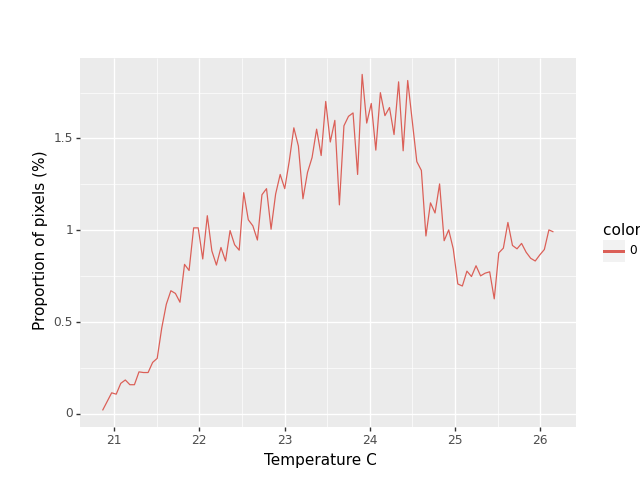

In [80]:
##### Analysis #####

# Analyze thermal data 

# Inputs:
#   img - Array of thermal values
#   mask - Binary mask made from selected contours
#   histplot - If True plots histogram of intensity values (default histplot = False)
#   label - Optional label parameter, modifies the variable name of observations recorded. (default `label="default"`)filled_img = pcv.morphology.fill_segments(mask=cropped_mask, objects=edge_objects)

analysis_img = pcv.analyze_thermal_values(thermal_array=thermal_data, mask=kept_mask, histplot=True, label="default")


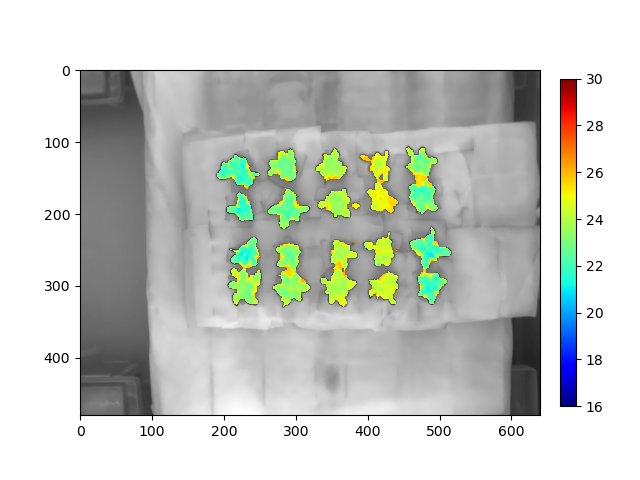

In [81]:
# Pseudocolor the thermal data 

# Inputs:
#     gray_img - Grayscale image data
#     obj - Single or grouped contour object (optional), if provided the pseudocolored image gets 
#           cropped down to the region of interest.
#     mask - Binary mask (optional) 
#     background - Background color/type. Options are "image" (gray_img, default), "white", or "black". A mask 
#                  must be supplied.
#     cmap - Colormap
#     min_value - Minimum value for range of interest
#     max_value - Maximum value for range of interest
#     dpi - Dots per inch for image if printed out (optional, if dpi=None then the default is set to 100 dpi).
#     axes - If False then the title, x-axis, and y-axis won't be displayed (default axes=True).
#     colorbar - If False then the colorbar won't be displayed (default colorbar=True)
pseudo_img = pcv.visualize.pseudocolor(gray_img = thermal_data, mask=kept_mask, cmap='jet', 
                                       min_value=16, max_value=30)

In [84]:
# Write thermal data to results file

# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename=args.result)